1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

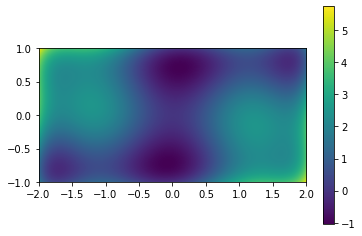

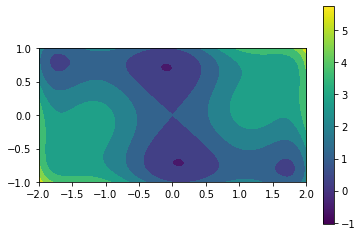

In [42]:
################################### FUNCTION ###########################################
#Definition of the six-hump camelback function with x and y values
def SixHumpCamelBackFunction(parameters):
    x=parameters[0]
    y=parameters[1]
    return (((4 - (2.1*(x**2))) + ((x**4)/3))*(x**2)) + (x*y) +(((4*(y**2)) - 4)*(y**2))
########################################################################################
################################### HINTS 1.&2.#########################################
#Restriction of the variables
#Set the steps as 0.01 for simplicity (so you can find the values for global minima/s)
x = np.arange(-2, 2,0.01)
y = np.arange(-1, 1,0.01)

#Finding visually the regions
#Meshgrid creates a grid with given x and y values
#Duplicates the x values as amount as y values
#Duplicates the y values as amount as x values
#Returns two arrays that for all possible mat
xDup, yDup = np.meshgrid(x, y, sparse=True)
z = SixHumpCamelBackFunction((xDup,yDup))


#Extent stands for restricting intervals of the graph
#imshow shows the 2D repsresentation of the dataset given
#In our case our dataset is te values that came from the function
plt.figure()
#Color bar shows the color that is dedicated to denote the fucntion return value
plt.imshow(z, extent=[-2, 2, -1, 1])
plt.colorbar()

plt.figure()
#Color bar shows the color that is dedicated to denote the fucntion return value
plt.imshow(z, extent=[-2, 2, -1, 1])
plt.colorbar()
plt.contourf(x,y,z)

#According to the colorbar and the two blots that are obtained below
#It seems that there are 2 global minimas, but needs to be find accurately
#Contour used in order to see the regions more properly with their heights



In [43]:
#From the contour map assumptions will be made for starting points
#From the starting point we will find the exact value of the global minima
#Approximations are designated from the observations from the contourf
startingPoints = [[-0.1, 0.7], [0.1, -0.7], [0, 0]] 

for startingPoint in starting_points:
    result = optimize.basinhopping(SixHumpCamelBackFunction, startingPoint, niter = 200)
    print("Starting point: ", startingPoint)
    print("Function Value: ", result.fun)
    print("[x, y]: ", result.x)
    
#There are 2 different global minimas that is obtained from the map above
#With the initial guess of (0,0) global minimas has been found
#Assumptions are really close according to the map
#Global minima coordinations are really close to the points that is obtained from the conotur map


Starting point:  [-0.1, 0.7]
Function Value:  -1.0316284534898772
[x, y]:  [-0.08984201  0.7126564 ]
Starting point:  [0.1, -0.7]
Function Value:  -1.0316284534898772
[x, y]:  [-0.08984201  0.7126564 ]
Starting point:  [0, 0]
Function Value:  -1.0316284534898772
[x, y]:  [ 0.08984202 -0.71265641]


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

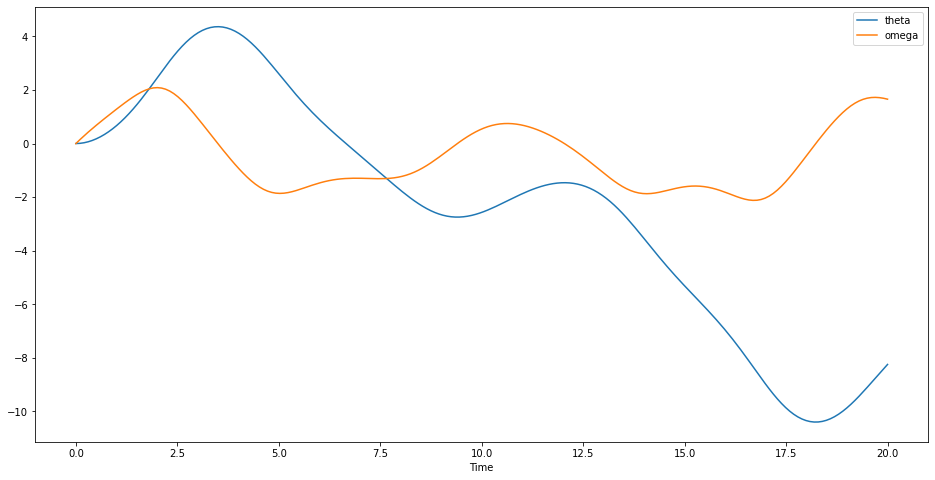

In [44]:
from scipy.integrate import odeint
#Lets define the given attributes
X = (0,0)
Q = 2.0
d = 1.5
omega = 0.65

#Since the question asks for the 200 time steps 
#Lets define the time with reqiured time steps

timeSteps = np.linspace(0,20,200)

#Definition of the derivative
def derivative(X,time,Q,d,omega):
    return (X[1], -1/Q*X[1] + np.sin(X[0]) + (d*np.cos(omega*time)))
#Solving the ODE with ODE int
X = odeint(derivative,X,timeSteps, args=(Q,d,omega))

#Creation of the plots
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(timeSteps, X[:,0], label="theta")
plt.plot(timeSteps, X[:,1], label="omega")
plt.xlabel("Time")
plt.legend()
plt.show()

#Change in the upperbound of the time will change the visualization of the plot
#Best visualizations are obtained in the upperbound is 10,20,30 and 40
#For simplicity, 20 is chosen as upperbound 
#For larger upperbound for time, visualization is messy

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [45]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
from scipy import fftpack
import pandas as pd
#Loading the datase - delimiter is needed since the data parsed with tabs
populationsData = pd.read_csv("data/populations.txt",delimiter='\t')
populationsData

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


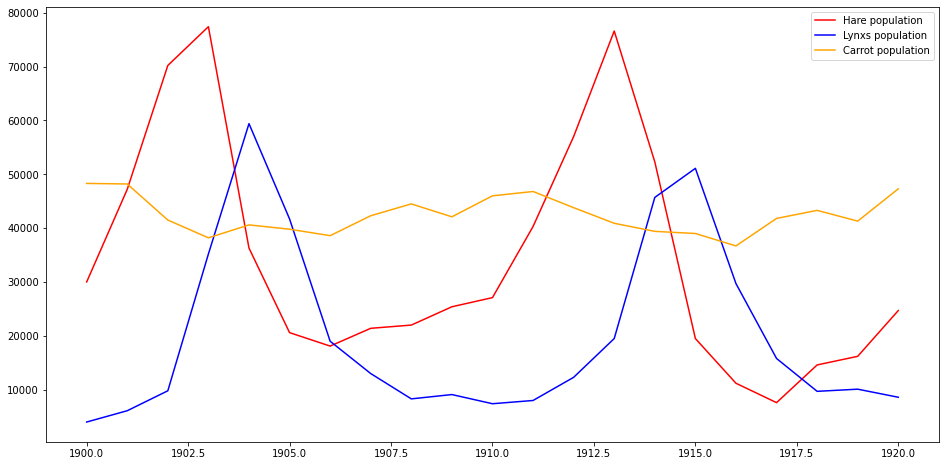

In [46]:
#Take the datas from the dataset indivudually
hares = np.array(populationsData["hare"])
lynxs = np.array(populationsData["lynx"])
carrot = np.array(populationsData["carrot"])
years = np.array(populationsData["# year"])

#Plot the data vor visualization
fig, ax = plt.subplots(1,1,figsize=(16, 8))
ax.plot(years, hares, color = "red", label = "Hare population")
ax.plot(years, lynxs, color = "blue", label = "Lynxs population")
ax.plot(years, carrot, color = "orange", label = "Carrot population")
ax.legend()

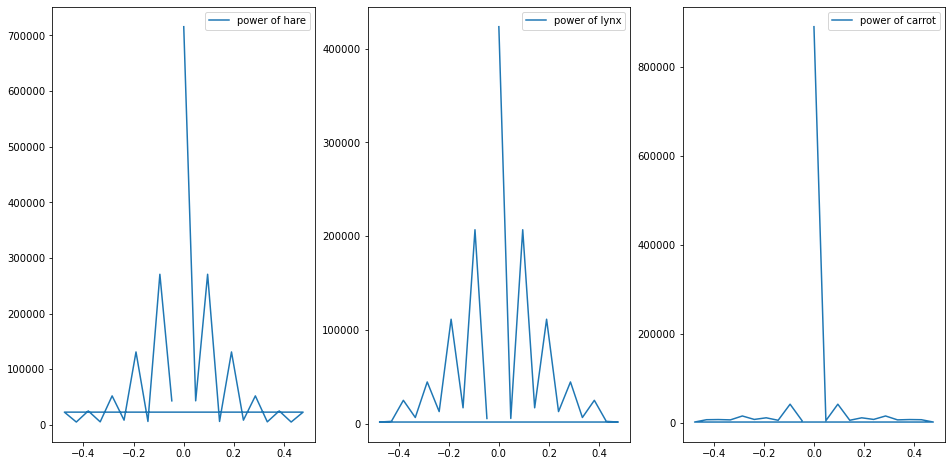

In [47]:
# The FFT of the hares signal
haresFFT = fftpack.fft(hares)

# The FFT of the lynxs signal
lynxsFFT = fftpack.fft(lynxs)

# The FFT of the carrot signal
carrotFFT = fftpack.fft(carrot)

# And the power (haresFFT is of complex dtype)
powerHares = np.abs(haresFFT)

# And the power (haresFFT is of complex dtype)
powerLynxs = np.abs(lynxsFFT)

# And the power (haresFFT is of complex dtype)
powerCarrots = np.abs(carrotFFT)

# The return the corresponding frequencies
timestep = years[1] - years[0]
sample_freq = fftpack.fftfreq(hares.size, d = timestep) 

#Plot the data vor visualization
fig, ax = plt.subplots(1,3,figsize=(16, 8))
ax[0].plot(sample_freq, powerHares,label = "power of hare")
ax[0].legend()

ax[1].plot(sample_freq, powerLynxs,label = "power of lynx")
ax[1].legend()

ax[2].plot(sample_freq, powerCarrots,label = "power of carrot")
ax[2].legend()

In [48]:
periodicityMask = np.where(sample_freq > 0)
frequencies = sample_freq[periodicityMask]
powersHares = powerHares[periodicityMask]
powersLynxs = powerLynxs[periodicityMask]
powersCarrots = powerCarrots[periodicityMask]
periodHares  = 1 / frequencies[np.argmax(powersHares)]
periodLynx = 1 / frequencies[np.argmax(powersLynxs)]
periodCarrots = 1 / frequencies[np.argmax(periodHares)]

print("Period(T) of Hare:", periodHares)
print("Period(T) of Lynx", periodLynx)
print("Period(T) of Carrots", periodCarrots)

#Lynx and Hares sharing the same period
#Their periods are 10.5 

Period(T) of Hare: 10.5
Period(T) of Lynx 10.5
Period(T) of Carrots 21.0


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

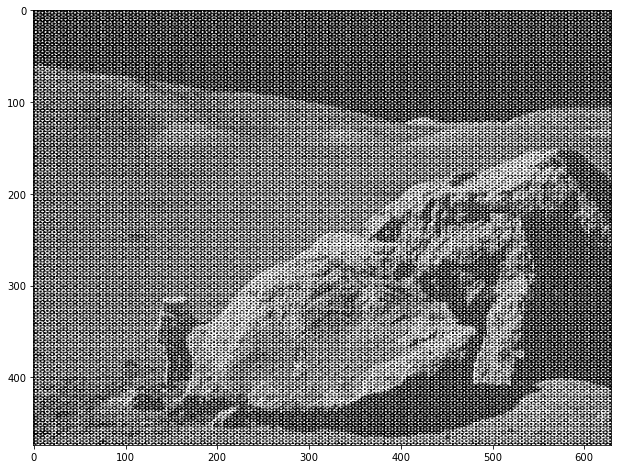

In [49]:
#İmporting the image as a 2D numpy array
moonlandingImage = plt.imread('images/moonlanding.png')
#Normal image is in the automatic color format
#Grayscale version of the image is more benefitial
#Image shown in a big scale in order to detect the noise properly
fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(moonlandingImage,'gray')

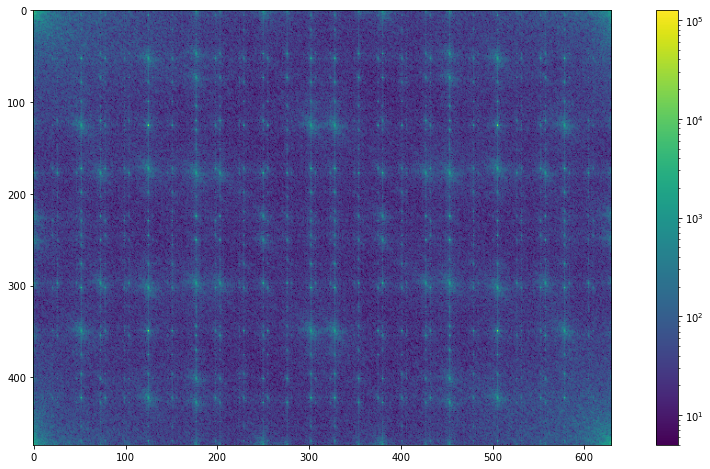

In [50]:
#scipy.fftpack.fft2 returns 2D-discrete fourier transform of the 2D arguement x
#Which in our case x is our image
from scipy import fftpack
from matplotlib.colors import LogNorm

imageFFT = fftpack.fft2(moonlandingImage)
fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(np.abs(imageFFT),norm=LogNorm(vmin = 5))
plt.colorbar()

#From the image observation it seems that in the corners we have noise

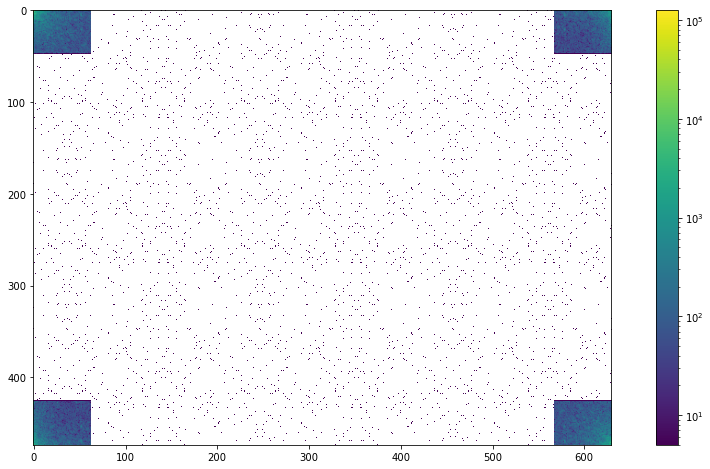

In [51]:
#Inspecting the spectrum, trying to locate the regions of power spectrum that contains the signal and that contains the periodic noise

fraction = 0.1
#Taking the shape of the FFT image will help to iterate
shape = imageFFT.shape
rows = shape[0]
columns = shape[1]

#Using array slicing
#Setting values to zero in the rows
imageFFT[int(rows * fraction): int(rows * (1 - fraction))] = 0

#Setting values to zero in the columns
imageFFT[:, int(columns * fraction): int(columns * (1 - fraction))] = 0

fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(np.abs(imageFFT), norm = LogNorm(vmin = 5))
plt.colorbar()
plt.show()



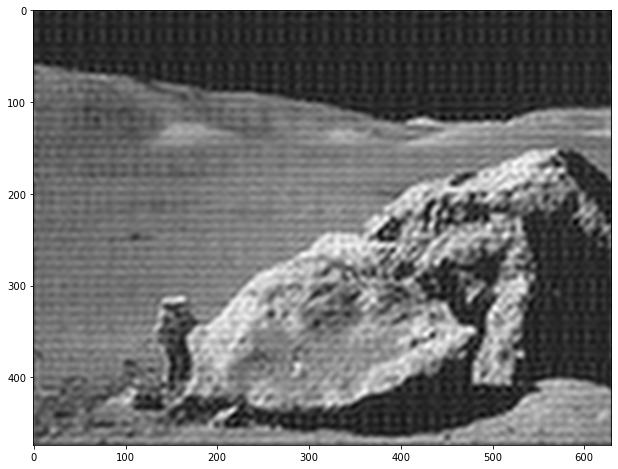

In [52]:
#Since I got an error (Image data of dtype complex64 cannot be converted to float) just use the real part of the data
notNoisyImage = fftpack.ifft2(imageFFT).real
fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(notNoisyImage, 'gray')
plt.show()

#Noise is little bit decreases but the image is still distorted
#Changing the fraction value will change the quality of the image
#Less fraction means more blurred, losing more data
#High fraction mean more distorted and noisy

# 0.1 is the better option for the fraction so far
#For the fraction part range [0.1-5] is tested